In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import trange
import glob
import joblib
import matplotlib.pyplot as plt

# 检查是否有GPU可用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 定义LSTM模型
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size):
        super(LSTM, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.hidden_cell = (torch.zeros(1, 1, self.hidden_layer_size).to(device),
                            torch.zeros(1, 1, self.hidden_layer_size).to(device))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq, self.hidden_cell)
        predictions = self.linear(lstm_out[:, -1])
        return predictions

# 处理单个文件，返回归一化后的数据和归一化器
def process_file(file):
    data_frame = pd.read_csv(file, header=None, usecols=[4, 5], names=['position-y', 'position-z'])
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(data_frame)
    return data_scaled, scaler

# 定义轨迹长度
bestScore = -100
bestLen = 0
d_values = []
accuracy_values = []

for d in trange(100, 1000, 5):
    # 创建数据集，包含前半段轨迹数据和对应的标签
    data = []
    labels = []
    base_directory_path = 'DataSet/'

    # 获取所有子目录
    subdirs = [d for d in os.listdir(base_directory_path) if os.path.isdir(os.path.join(base_directory_path, d))]

    desired_length = d  # 您可以根据数据的实际情况调整这个值
    for subdir in subdirs:
        letter = subdir  # 子目录名称即为字母
        directory_path = os.path.join(base_directory_path, subdir)
        all_files = glob.glob(os.path.join(directory_path, "ee*.csv"))

        for file in all_files:
            data_scaled, _ = process_file(file)
            half_len = len(data_scaled) // 2

            if half_len >= desired_length:
                data_to_use = data_scaled[:desired_length].flatten()
            else:
                data_to_use = np.pad(data_scaled[:half_len].flatten(), (0, desired_length*2 - half_len*2), 'constant')

            data.append(data_to_use)
            labels.append(letter)

    data = np.array(data)
    labels = np.array(labels)

    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

    # 使用KNN训练分类器
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)

    d_values.append(d)
    accuracy_values.append(accuracy)

    if accuracy > bestScore:
        print(f'Classification accuracy: {accuracy:.4f}')
        print(f'======={bestLen}=======')
        bestLen = d
        bestScore = accuracy

# 绘制d值和分类精度的关系图
plt.figure(figsize=(10, 6))
plt.plot(d_values, accuracy_values, marker='o', linestyle='-', color='b')
plt.xlabel('Sequence Length (d)')
plt.ylabel('Classification Accuracy')
plt.title('Classification Accuracy vs. Sequence Length')
plt.grid(True)
plt.show()

Using device: cuda


  0%|          | 0/180 [00:00<?, ?it/s]
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f6b940ac790>>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
KeyboardInterrupt: 

KeyboardInterrupt



In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Simulate some data for demonstration
d_values = np.arange(100, 1000, 5)
accuracy_values = np.random.uniform(0.7, 0.95, len(d_values))  # Simulated accuracy values

# Create a DataFrame
df = pd.DataFrame({
    'Sequence Length (d)': d_values,
    'Classification Accuracy': accuracy_values
})

# Set color map
cmap = sns.light_palette("seagreen", as_cmap=True)

# Display only a subset of the table, for example, the first 20 rows
subset_df = df.head(20)

# Create and display the styled table with color coding
styled_subset_df = subset_df.style.background_gradient(cmap=cmap)
styled_subset_df

,Sequence Length (d),Classification Accuracy
0,100,0.831318
1,105,0.857764
2,110,0.791968
3,115,0.825755
4,120,0.931900
5,125,0.912500
6,130,0.879555
7,135,0.816172
8,140,0.841276
9,145,0.869284


In [5]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import trange
import glob
import joblib
from tqdm import trange

# 检查是否有GPU可用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 定义LSTM模型
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size):
        super(LSTM, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.hidden_cell = (torch.zeros(1, 1, self.hidden_layer_size).to(device),
                            torch.zeros(1, 1, self.hidden_layer_size).to(device))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq, self.hidden_cell)
        predictions = self.linear(lstm_out[:, -1])
        return predictions

# 处理单个文件，返回归一化后的数据和归一化器
def process_file(file):
    data_frame = pd.read_csv(file, header=None, usecols=[4, 5], names=['position-y', 'position-z'])
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(data_frame)
    return data_scaled, scaler
# 定义轨迹长度
desired_length = 310  # 您可以根据数据的实际情况调整这个值
# 创建数据集，包含前半段轨迹数据和对应的标签
data = []
labels = []
base_directory_path = 'DataSet/'

# 获取所有子目录
subdirs = [d for d in os.listdir(base_directory_path) if os.path.isdir(os.path.join(base_directory_path, d))]


for subdir in subdirs:
    letter = subdir  # 子目录名称即为字母
    directory_path = os.path.join(base_directory_path, subdir)
    all_files = glob.glob(os.path.join(directory_path, "ee*.csv"))

    for file in all_files:
        data_scaled, _ = process_file(file)
        half_len = len(data_scaled) // 2

        if half_len >= desired_length:
            data_to_use = data_scaled[:desired_length].flatten()
        else:
            data_to_use = np.pad(data_scaled[:half_len].flatten(), (0, desired_length*2 - half_len*2), 'constant')

        data.append(data_to_use)
        labels.append(letter)

data = np.array(data)
labels = np.array(labels)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# 使用KNN训练分类器
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print(f'Classification accuracy: {knn.score(X_test, y_test):.5f}')

Using device: cuda
Classification accuracy: 0.79126


Classification accuracy: 0.79126
Confusion Matrix:
[[20  0  1  0  0  0  0  0  0]
 [ 0 14  2  0  0  0  0  0  0]
 [ 1  4 16  0  0  0  0  0  0]
 [ 0  0  1 38  0  6  0  0  0]
 [ 0  0  1  0 19  1  0  1  3]
 [ 1  0  1  5  0 15  0  1  0]
 [ 0  0  0  0  1  0 14  1  1]
 [ 2  0  1  1  0  0  2 14  0]
 [ 0  0  0  2  2  0  1  0 13]]
Precision: 0.79240
Recall: 0.79126
F1 Score: 0.79005


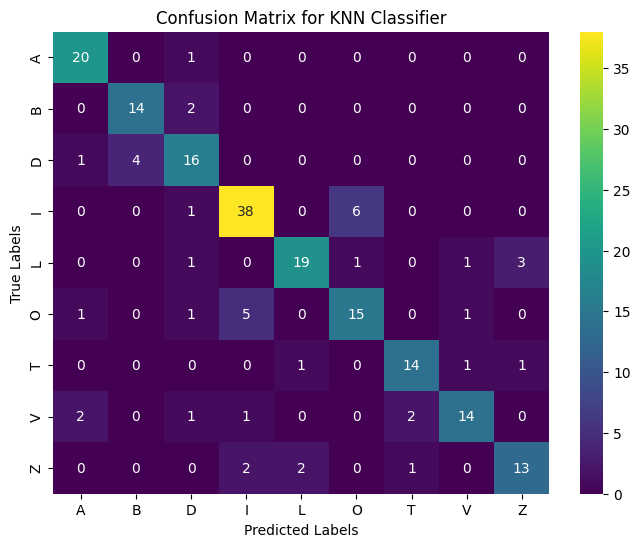

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# 使用KNN模型进行预测
y_pred = knn.predict(X_test)

# 计算分类准确性
accuracy = accuracy_score(y_test, y_pred)
print(f'Classification accuracy: {accuracy:.5f}')

# 生成混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

# 计算精确度、召回率和F1分数
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1 Score: {f1:.5f}')

# 绘制混淆矩阵热力图
labels_list = sorted(list(set(y_test)))  # 获取唯一标签并排序

# 绘制混淆矩阵热力图
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", cbar=True,
            xticklabels=labels_list, yticklabels=labels_list)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

## Show the KNN result

Average classification time for 10 files: 0.0045 seconds


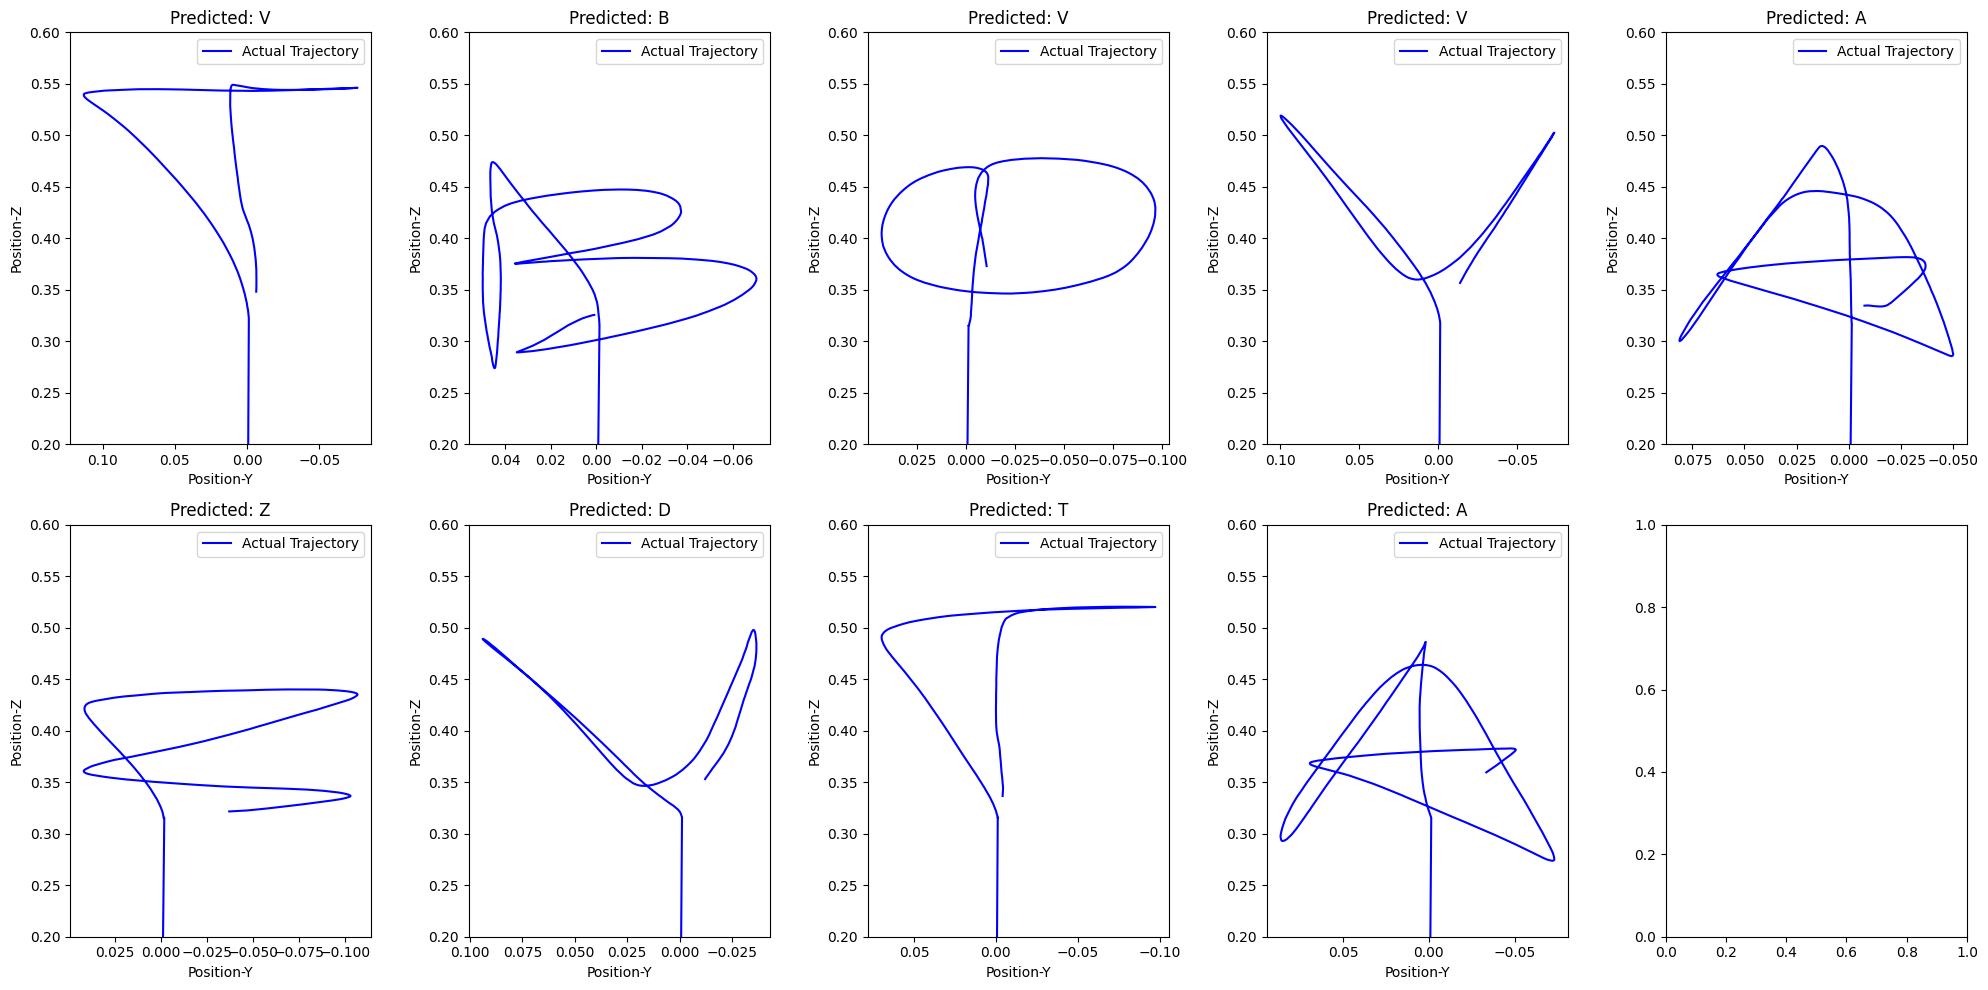

In [13]:
import os
import random
import matplotlib.pyplot as plt
import glob
import time
import numpy as np
import pandas as pd

# 假设 process_file 和 knn 已经定义
# base_directory_path 和 subdirs 也需要事先定义

# 定义绘图函数
def plot_classification_results(selected_files, knn):
    fig, axs = plt.subplots(2, 5, figsize=(20, 10))
    axs = axs.flatten()
    
    classification_times = []  # List to store classification times

    for idx, file in enumerate(selected_files):
        start_time = time.time()  # Start timing

        data_scaled, _ = process_file(file)
        half_len = len(data_scaled) // 2
        front_half = data_scaled[:half_len].flatten()

        if half_len < desired_length:
            front_half = np.pad(front_half, (0, desired_length*2 - half_len*2), 'constant')
        else:
            front_half = front_half[:desired_length*2]

        front_half = front_half.reshape(1, -1)

        # 使用分类器预测字母
        predicted_letter = knn.predict(front_half)[0]
        
        end_time = time.time()  # End timing
        classification_time = end_time - start_time
        classification_times.append(classification_time)  # Store the time

        # 读取数据并过滤
        data_frame = pd.read_csv(file, header=None, usecols=[4, 5], names=['position-y', 'position-z'])

        # 过滤y值小于0.15的点
        filtered_data = data_frame[data_frame['position-y'] <= 0.15]

        # 取出过滤后的x和y
        x = filtered_data['position-y']
        y = filtered_data['position-z']
        
        # 绘制过滤后的轨迹数据
        axs[idx].plot(x, y, label='Actual Trajectory', color='blue')

        axs[idx].set_title(f'Predicted: {predicted_letter}')
        axs[idx].set_xlabel('Position-Y')
        axs[idx].set_ylabel('Position-Z')
        axs[idx].set_ylim(0.2, 0.6)
        # axs[idx].set_xlim(-0.3, 0.5)
        axs[idx].invert_xaxis()  # Flip the x-axis
        axs[idx].legend()

    # Calculate and print the average classification time
    average_time = np.mean(classification_times)
    print(f"Average classification time for 10 files: {average_time:.4f} seconds")

    plt.tight_layout()
    plt.show()

# 随机抽取10个文件进行分类并绘制结果
selected_files = []
for _ in range(10):
    subdir = random.choice(subdirs)
    directory_path = os.path.join(base_directory_path, subdir)
    all_files = glob.glob(os.path.join(directory_path, "ee*.csv"))
    
    # 仅当目录中存在匹配文件时才选择文件
    if all_files:
        selected_files.append(random.choice(all_files))

# 确保我们有足够的文件进行绘图
if len(selected_files) < 10:
    print(f"Warning: Only {len(selected_files)} files were selected. Some directories might not contain matching files.")

# 绘制分类结果
if selected_files:
    plot_classification_results(selected_files, knn)
else:
    print("No files were selected for classification plotting.")